# Housing price : Linear regression model

## Problem Statement:

A US-based housing company named <b>Surprise Housing</b> has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
<br>
The company has collected a data set from the sale of houses in Australia, which is available as a CSV file.
<br>
The company is looking at prospective properties to buy to enter the market. We are required to build a regression model in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
<br>
The compaby wants to know:
<ul>
    <li>Which variables are significant in predicting the price of a house, and</li>
    <li>How well those variables describe the price of a house.</li>
</ul>

## Business Goal:

This housing price model will be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Reading and understanding data

In [5]:
import numpy as np
import pandas as pd

In [52]:
# Read dataset
data = pd.read_csv("train.csv")
pd.concat([data.head(3), data.tail(3)])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [53]:
# Check dimension
print("Shape of original data set:", data.shape)

Shape of original data set: (1460, 81)


In [54]:
# Get basic information about the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing values treatment

In [55]:
print("Missing value percentage in each column:")
missing_values = (round(data.isnull().sum() / data.shape[0], 3) * 100).loc[lambda x: x > 0.0]
print(missing_values.sort_values(ascending=False).to_string())

Missing value percentage in each column:
PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageType       5.5
GarageYrBlt      5.5
GarageFinish     5.5
GarageQual       5.5
GarageCond       5.5
BsmtExposure     2.6
BsmtFinType2     2.6
BsmtFinType1     2.5
BsmtCond         2.5
BsmtQual         2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1


In [56]:
# Replace missing values in PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual with "NA"
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
data[columns] = data[columns].fillna('NA')

In [57]:
# Imputing missing values LotFrontage and MasVnrArea with mean
for col in ['LotFrontage', 'MasVnrArea']:
    data.fillna(data[col].mean(), inplace = True)

In [58]:
# Imputing missing values in GarageYrBlt, MasVnrType and Electrical with mode
for col in ['GarageYrBlt', 'MasVnrType', 'Electrical']:
    data.fillna(data[col].mode(), inplace = True)

In [59]:
# Check if there is any missing value left
data.isnull().any().any()

False

### Describing data

In [60]:
# Get descriptive statistics of data
numerical_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

print("Description statisctics of data:\n\n")
print(data[numerical_vars].describe())

Description statisctics of data:


       LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.500959   443.639726    46.549315   
std      22.024023    9981.264932   180.586195   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      70.049958    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.5284

### Visualizing data

#### Visualizing numeric data

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

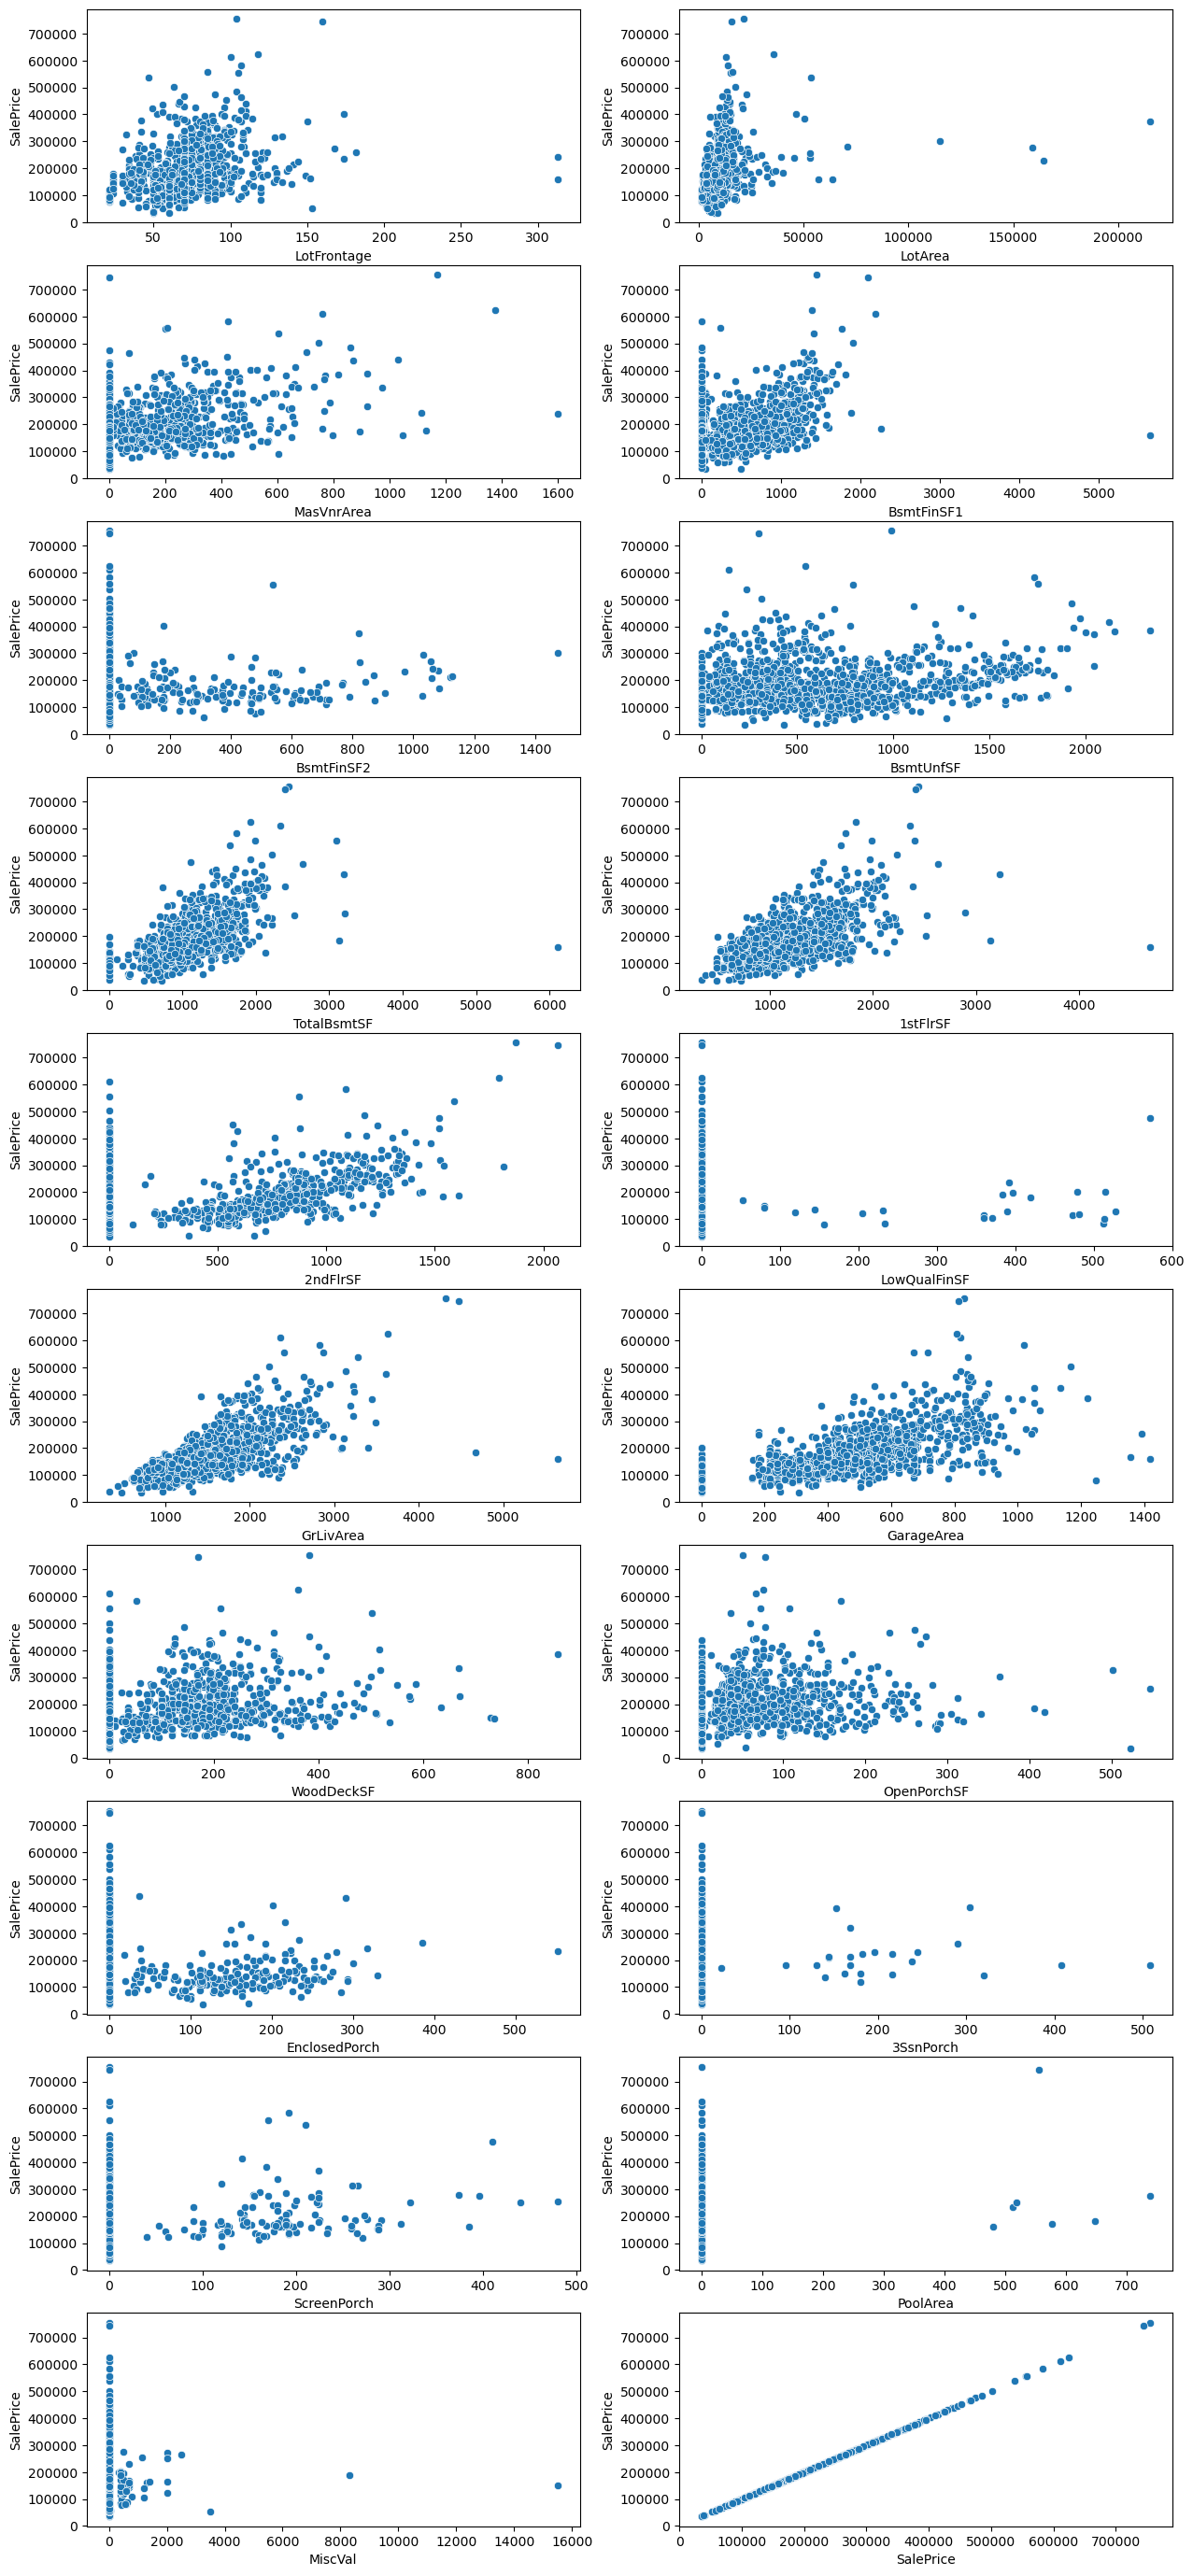

In [62]:
# Visualize the relationship of numeric variables with Target variable using scatter plots.
plt.figure(figsize=(15, 35))

for index, var in enumerate(numerical_vars):
    plt.subplot(10, 2, index + 1)
    sns.scatterplot(data, x= var, y= 'SalePrice')
plt.show()

We do observe some sort of linear pattern between a few variables like GrLivArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GarageArea, etc with the target varaible SalePrice.

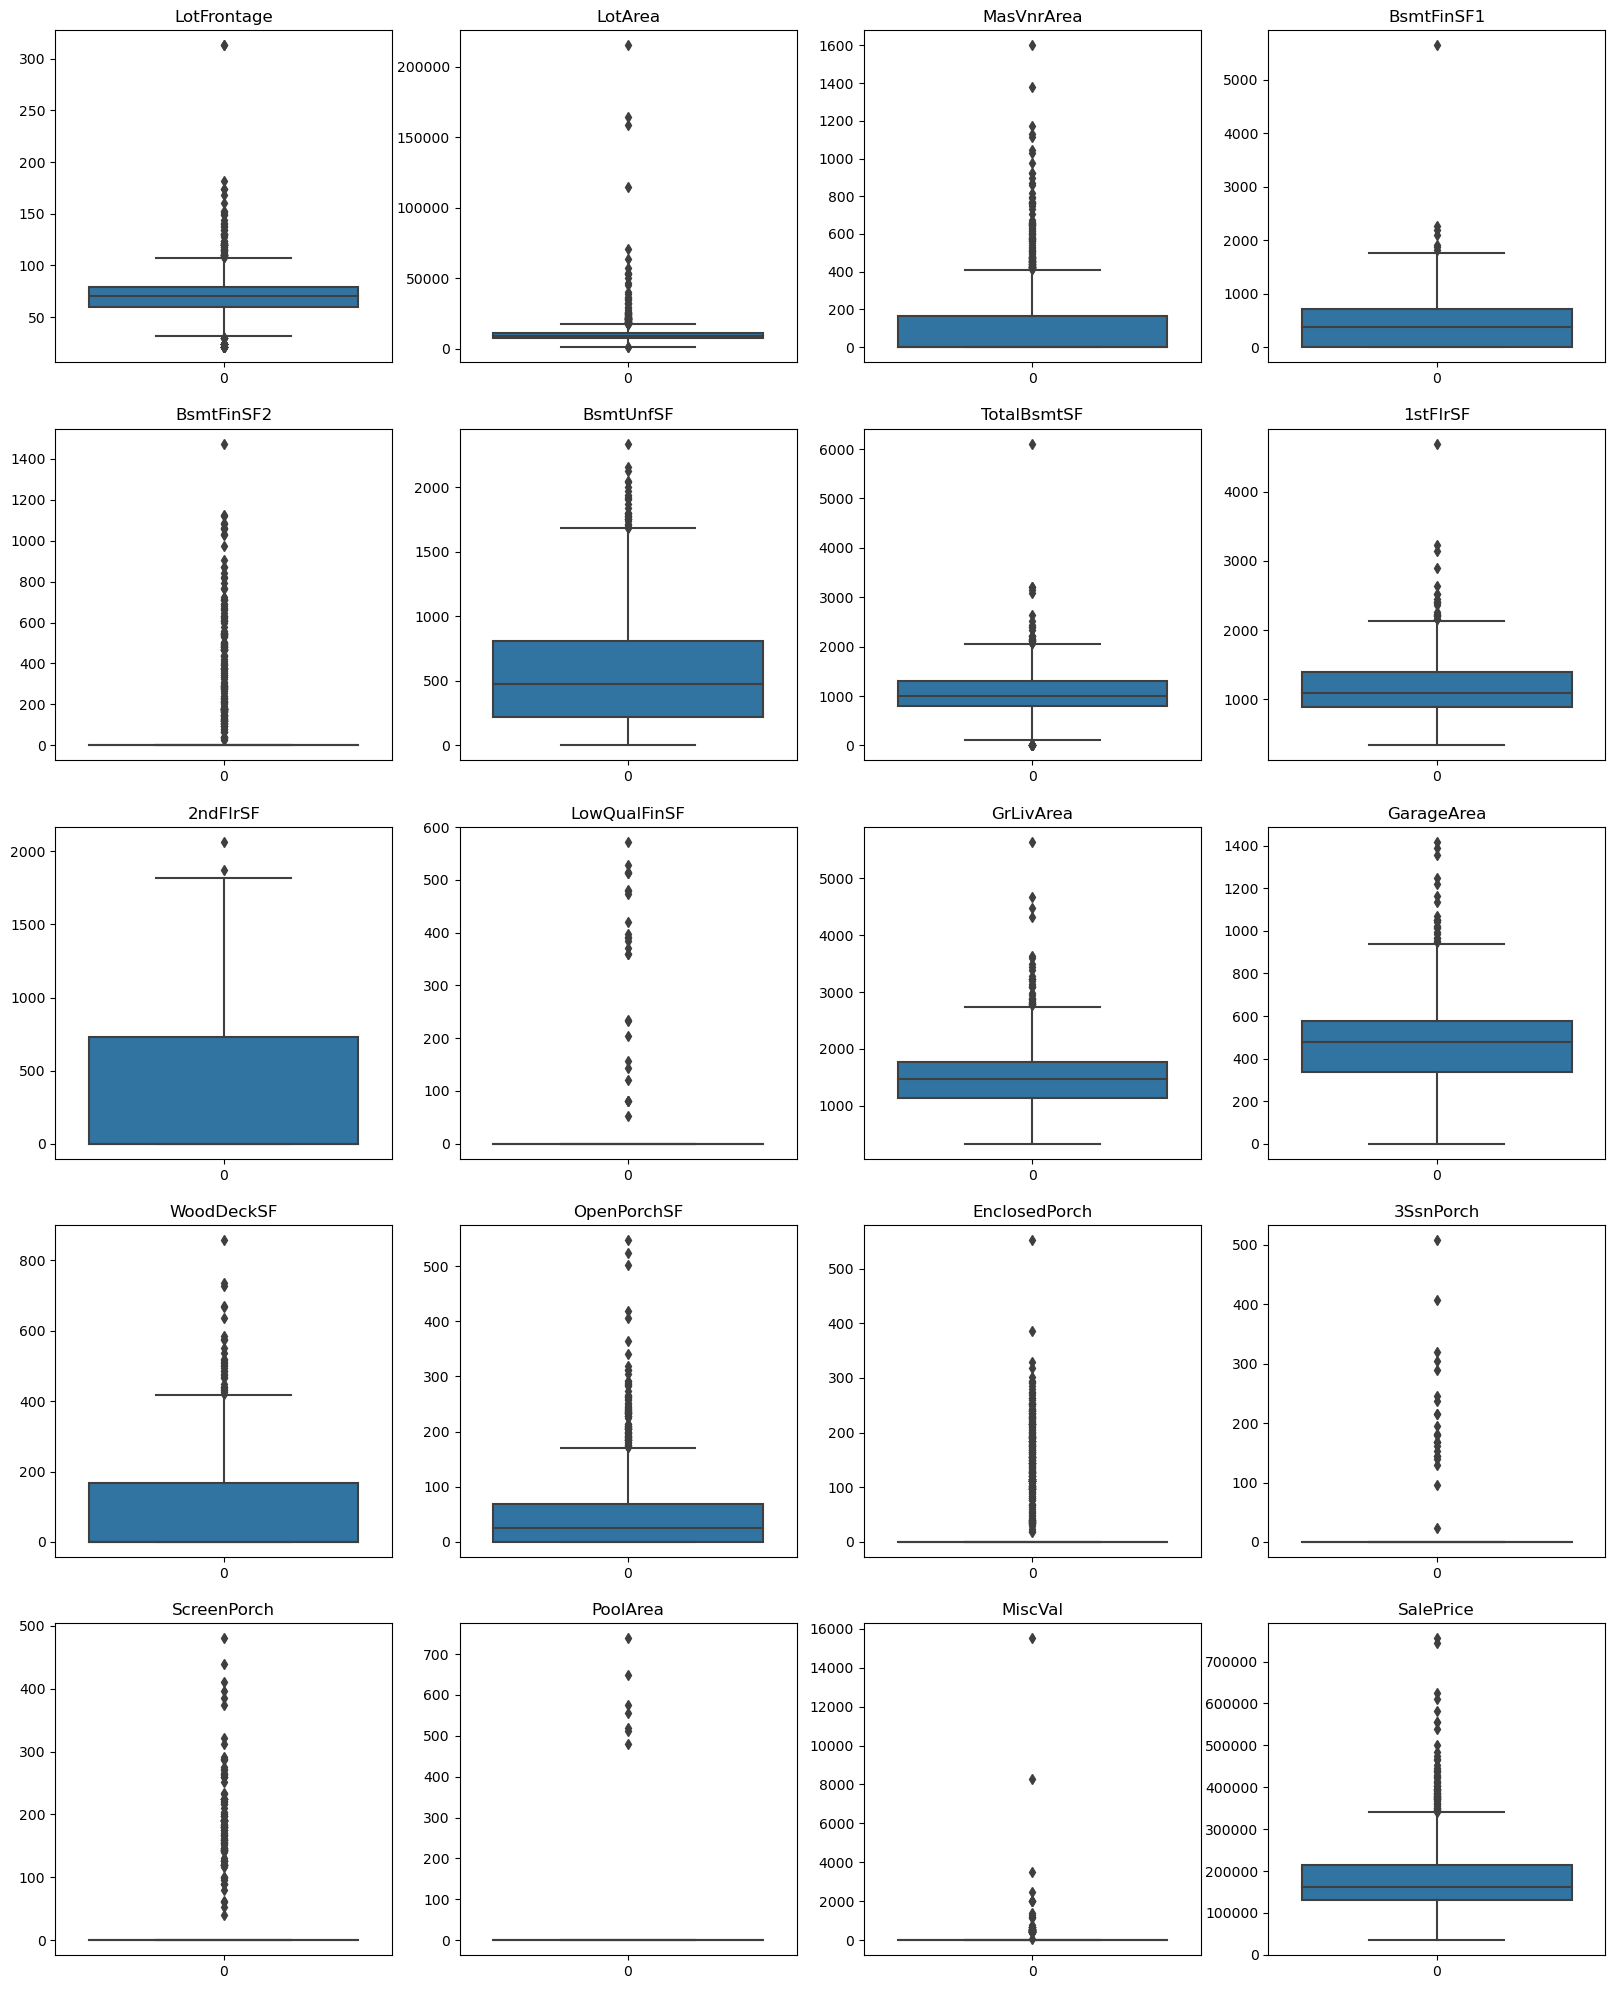

In [63]:
# Visualizing numerical variables using boxplots to check if there are outliers
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))

# Looping through the columns and plotting each variable on a boxplot
for i, j in enumerate(numerical_vars):
    row = i // 4
    col = i % 4
    ax = axes[row][col]
    sns.boxplot(data[j], ax= ax)
    ax.set_title(j)

plt.show()

### Outlier treatment

In [64]:
# Function to get upper and lower threshold values to check outlier
def outlier_thresholds(df, column_name, q1=0.5, q3=0.95):
    quartile_1 = df[column_name].quantile(q1)
    quartile_3 = df[column_name].quantile(q3)
    iqr = quartile_3 - quartile_1 # inter quartile range
    upper = quartile_3 + 1.5 * iqr
    lower = quartile_1 - 1.5 * iqr
    return lower, upper

def check_outlier(df, column_name):
    lower_threshold, upper_threshold = outlier_thresholds(df, column_name)
    if df[(df[column_name] < lower_threshold) | (df[column_name] > upper_threshold)].any(axis = None):
        return True
    return False

columns_with_outliers = []
for col in numerical_vars:
    if check_outlier(data, col):
        columns_with_outliers.append(col)
print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [65]:
# fixing outliers 

def fix_outliers(df, column_name):
    lower_threshold, upper_threshold = outlier_thresholds(df, column_name)
    # values less than lower_threshold is replaced by lower_threshold
    df.loc[(df[column_name] < lower_threshold), column_name] = lower_threshold
    # values more than upper_threshold is replaced by upper_threshold
    df.loc[(df[column_name] > upper_threshold), column_name] = upper_threshold

for col in columns_with_outliers:
    fix_outliers(data, col)

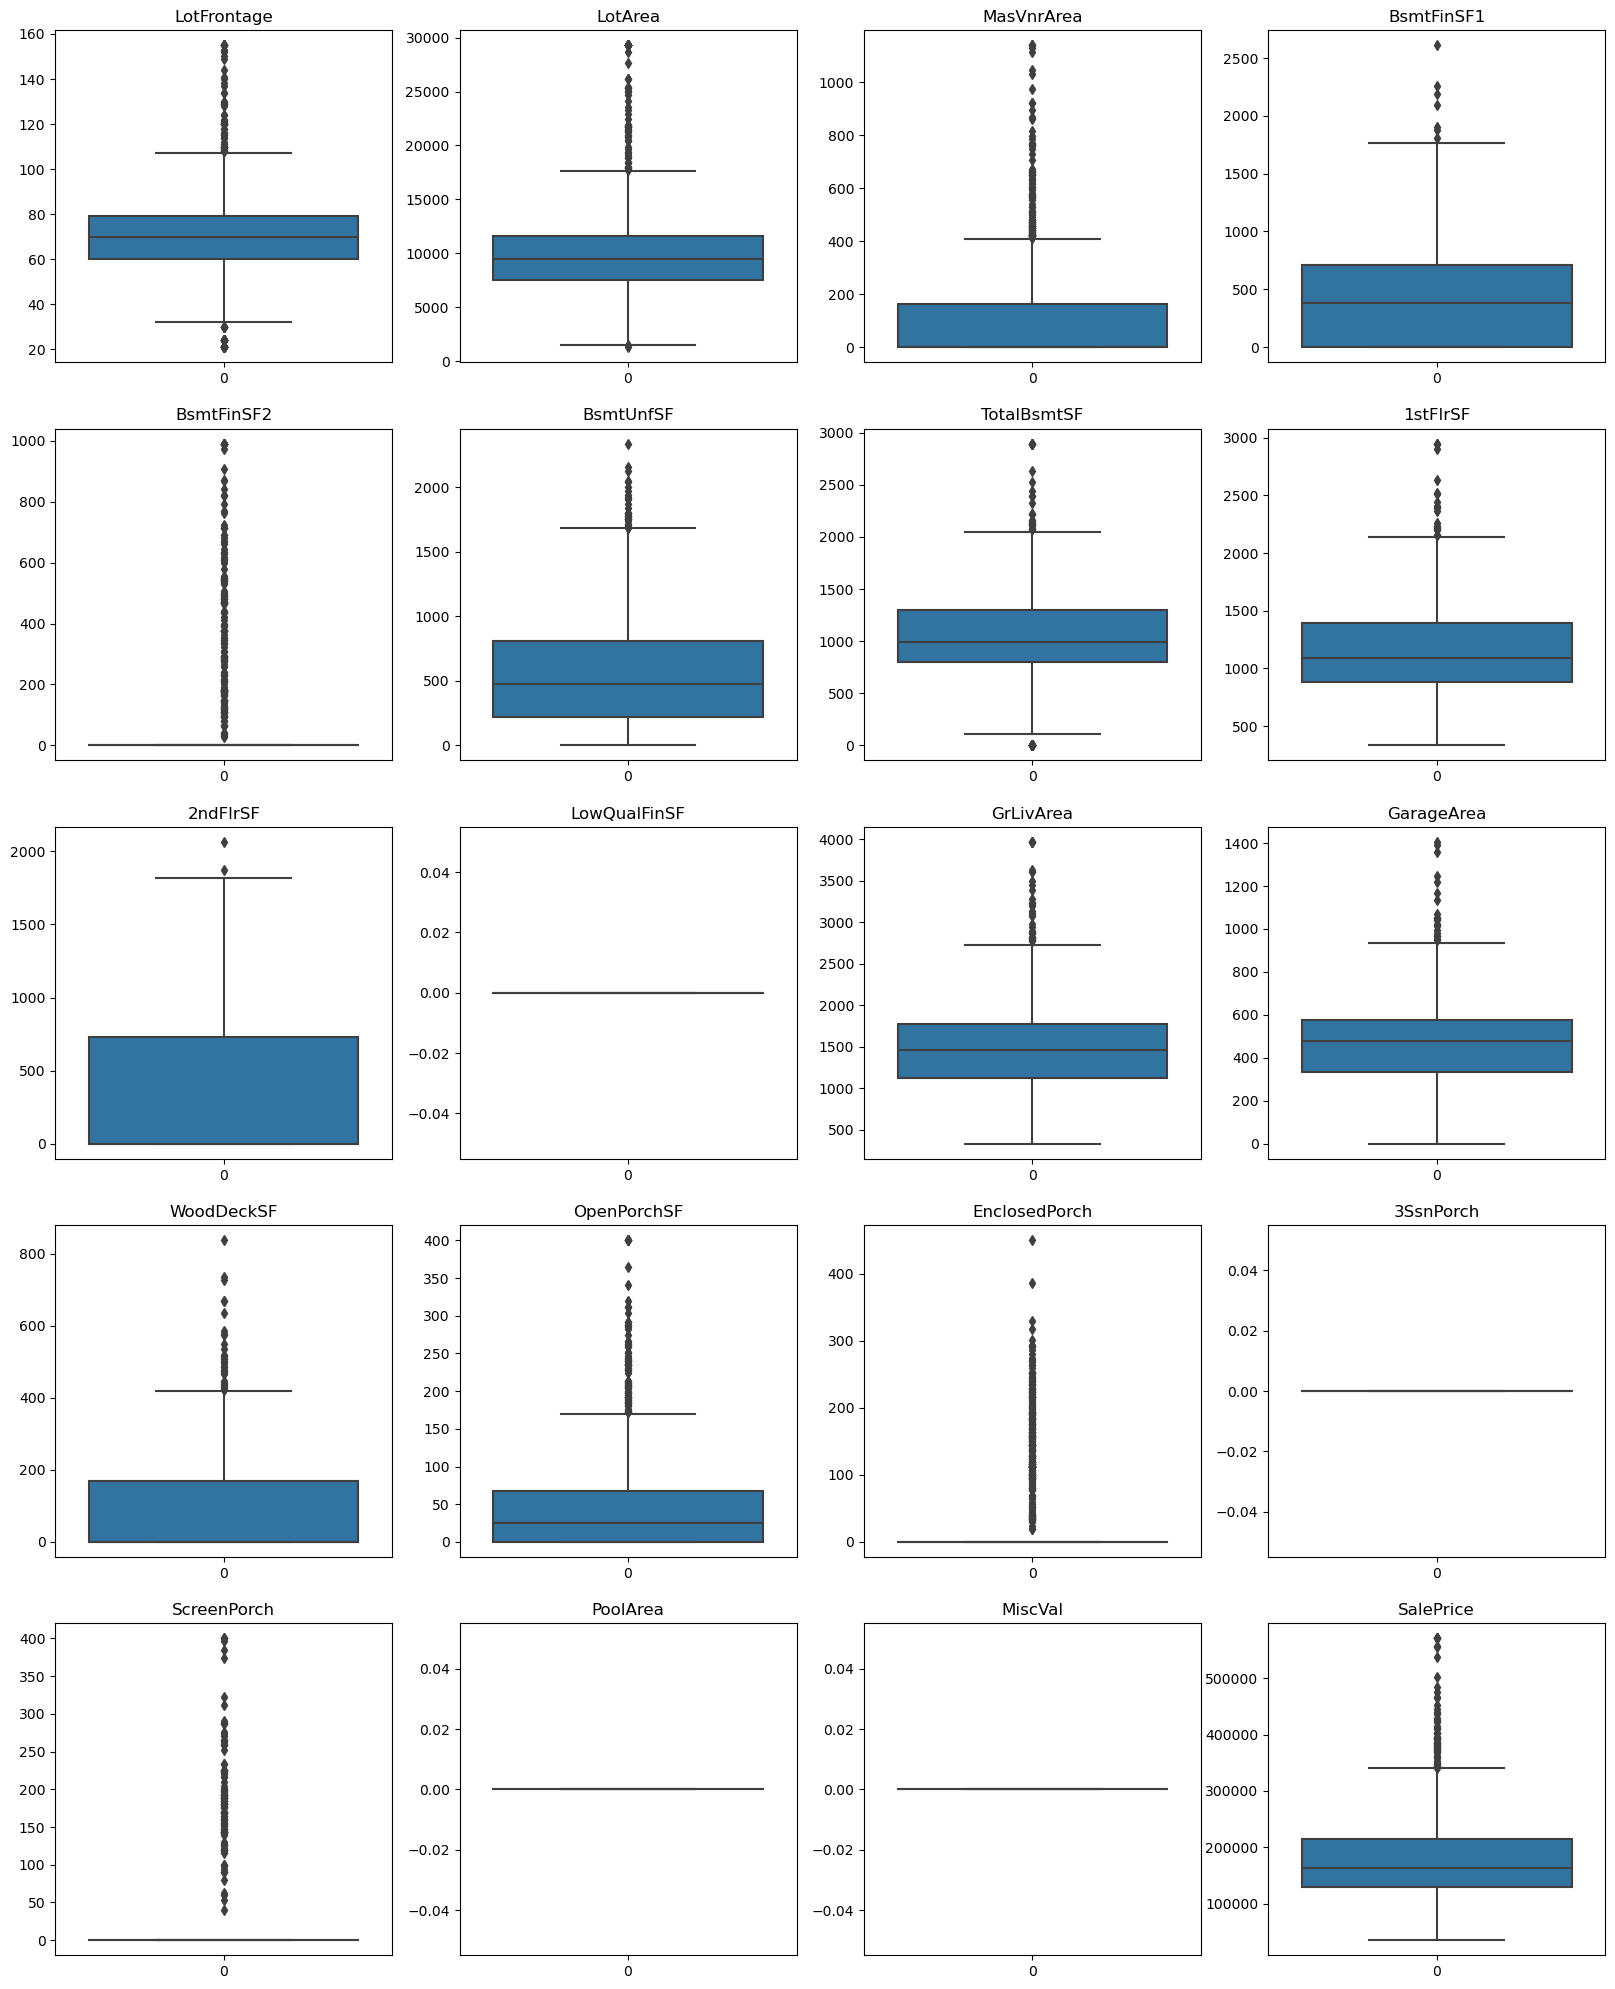

In [66]:
# Visualizing boxplots post outlier treatment
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))

# Looping through the columns and plotting each variable on a boxplot
for i, j in enumerate(numerical_vars):
    row = i // 4
    col = i % 4
    ax = axes[row][col]
    sns.boxplot(data[j], ax= ax)
    ax.set_title(j)

plt.show()

### Data cleaning

In [67]:
# Drop column 'Id' since it is an identity/index column
data = data.drop('Id', axis= 1)

# Drop GarageYrBlt as is doesn't seem to affect Target variable. We already have other variables related to garage which are meaningful
data = data.drop('GarageYrBlt', axis= 1)

In [68]:
# Map values of binary variable CentralAir to 0/1
data['CentralAir'] = data['CentralAir'].map({'Y': 1, 'N': 0})

### Preparing data for model

#### Get dummy variables for non-binary categorical variables

In [69]:
vars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PoolQC',
        'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'PavedDrive', 'SaleCondition']
dummies = []
for var in vars:
    dummies.append(pd.get_dummies(data[var], drop_first= True, prefix= var))

# Merge dummy variables and drop originals
for dummy_vars in dummies:
    data = pd.concat([data, dummy_vars], axis=1)

data.drop(vars, inplace= True, axis= 1)
data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,2003,196.0,706.0,0.0,150,856.0,1,...,0,0,1,0,1,0,0,0,1,0
1,80.0,9600.0,1976,1976,0.0,978.0,0.0,284,1262.0,1,...,0,0,1,0,1,0,0,0,1,0
2,68.0,11250.0,2001,2002,162.0,486.0,0.0,434,920.0,1,...,0,0,1,0,1,0,0,0,1,0
3,60.0,9550.0,1915,1970,0.0,216.0,0.0,540,756.0,1,...,0,0,1,0,1,0,0,0,0,0
4,84.0,14260.0,2000,2000,350.0,655.0,0.0,490,1145.0,1,...,0,0,1,0,1,0,0,0,1,0


#### Derived features

In [70]:
# Deriving building age using YearBuilt and YrSold
data['Building_Age'] = data['YrSold'] - data['YearBuilt']

# Deriving Remodelled binary variable using YearBuilt and YearRemodAdd to specify whether building was renovated or not
data['Remodelled'] = (data['YearRemodAdd'] - data['YearBuilt']).apply(lambda x: 1 if x > 0 else 0)

# Deriving Maintenance Age using YearRemodAdd and YrSold to calculate how recently building was renovated before its sale
data['Maintenance_Age'] = data['YrSold'] - data['YearRemodAdd']

# Dropping YearBuilt, YearRemodAdd and YrSold as we have derived meanful variables out of these
data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], inplace= True, axis= 1)
data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Building_Age,Remodelled,Maintenance_Age
0,65.0,8450.0,196.0,706.0,0.0,150,856.0,1,856.0,854,...,0,1,0,0,0,1,0,5,0,5
1,80.0,9600.0,0.0,978.0,0.0,284,1262.0,1,1262.0,0,...,0,1,0,0,0,1,0,31,0,31
2,68.0,11250.0,162.0,486.0,0.0,434,920.0,1,920.0,866,...,0,1,0,0,0,1,0,7,1,6
3,60.0,9550.0,0.0,216.0,0.0,540,756.0,1,961.0,756,...,0,1,0,0,0,0,0,91,1,36
4,84.0,14260.0,350.0,655.0,0.0,490,1145.0,1,1145.0,1053,...,0,1,0,0,0,1,0,8,0,8


#### Spit data into Train-Test

In [71]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size= 0.7, random_state= 100)
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

Training data shape: (1021, 328)
Test data shape: (439, 328)


#### Rescale features

In [72]:
from sklearn.preprocessing import MinMaxScaler
# normalisation: (x - xmin) / (xmax - xmin)
scaler = MinMaxScaler()
# create a list of variables to be rescaled
scale_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
              '2ndFlrSF', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
              'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
              'Building_Age', 'Maintenance_Age']
# Fit on data
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Building_Age,Remodelled,Maintenance_Age
318,0.515213,0.302897,0.224561,0.378197,0.00000,0.154110,0.465245,1,0.388255,0.616949,...,0,1,0,0,0,1,0,0.117647,0,0.278689
239,0.231473,0.261219,0.000000,0.036019,0.00000,0.274401,0.253864,1,0.165397,0.333656,...,0,1,0,0,0,1,0,0.477941,1,1.000000
986,0.283741,0.137837,0.000000,0.000000,0.00000,0.207620,0.167516,1,0.244213,0.307022,...,0,1,0,0,0,1,0,0.705882,1,0.065574
1416,0.291208,0.354681,0.000000,0.000000,0.00000,0.332620,0.268371,1,0.339335,0.505569,...,0,0,0,0,0,1,0,0.919118,1,1.000000
390,0.216539,0.249136,0.000000,0.092346,0.39475,0.098031,0.297384,1,0.228682,0.196610,...,0,1,0,0,0,1,0,0.794118,1,0.967213


## Model building

In [73]:
# Create X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

### Model 1: Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
# Print the coefficients and intercept
print(lr.intercept_)
print(lr.coef_)

7507068919.770807
[ 1.10361617e-02  5.77555418e-02  2.38701974e-02  3.86251181e-01
  1.45036129e-01  2.76874780e-01 -2.29154765e-01  2.35671048e-03
  2.79457743e-01  2.29238744e-01  3.78599798e+09 -4.59438420e-03
  3.58683270e-02  1.07661617e-02  1.77174067e-02  1.28493337e-02
 -2.71405026e+08  9.62992648e-03 -1.85382185e+09 -1.39042370e+09
 -2.36446501e-03 -5.13305336e-02  9.90369019e-04 -1.90563226e-02
  3.30051772e-03 -6.75362922e-03 -3.72920929e-02  7.27840034e-04
 -1.41158612e-02  2.51789095e+09 -2.87339341e-02 -3.56253090e-02
 -2.57714544e-02  7.92131979e+07  6.28204644e-02  6.67190850e-02
  6.06655478e-02  5.74627072e-02  1.08435601e-02 -8.69393349e-03
 -7.38799572e-03  1.45770609e-03  2.03974247e-02  3.21304798e-03
 -6.57200813e-04  9.05856490e-04  7.16048479e-03  1.36528276e-02
  1.37873888e-02 -1.32751465e-02 -3.00079584e-04 -9.50813293e-04
  1.15500987e-02  1.61028057e-02  4.94790338e-02  1.34159029e-02
  1.97448730e-02  1.68714523e-02  2.24226713e-03  6.25558496e-02
 -5.441

In [77]:
# Make predictions on trainig set
y_pred_train = lr.predict(X_train)

In [78]:
# Calculate metrics
metrics = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metrics.append(r2_train_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metrics.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metrics.append(mse_train_lr**0.5)

0.9622361790122944
0.7868417759213338
0.0007706579587868107


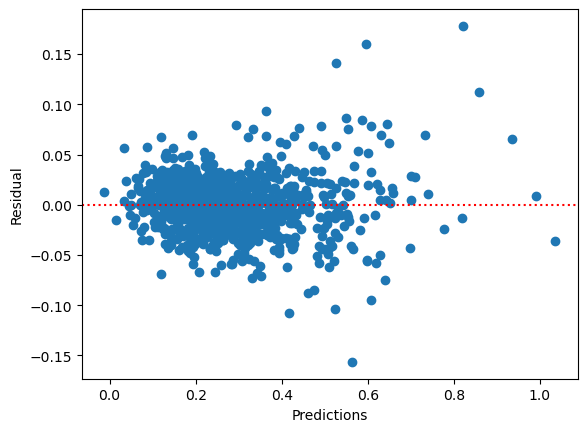

In [79]:
# Residual analysis
y_res = y_train - y_pred_train
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

R-squared looks pretty good and Residual analysis also shows there is no definite pattern in the plot between predictions and residuals. So we cna use this model for predictions.

In [80]:
# Make predictions on test set

# transform data
df_test[scale_vars] = scaler.transform(df_test[scale_vars])

# Create X and y
y_test = df_test.pop('SalePrice')
X_test = df_test

# Predict
y_pred_test = lr.predict(X_test)

In [81]:
# Calculate metrics

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metrics.append(r2_test_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metrics.append(rss2_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metrics.append(mse_test_lr**0.5)

-3.73805814217892e+18
3.6350320847201624e+19
8.280255318269163e+16


Surprisingly, R-squared metric on test data set is very poor as compared to that of training set which means this model is overfit. So lets try normalization techniques, Ridge and Lasso to create better models.

### Model 2: Ridge Linear Regression

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
# Printing the optimal hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [84]:
# Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised
ridge = Ridge(alpha= 4)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.49343769e-02  3.32107417e-02  1.73576469e-02  5.30395303e-02
  1.55807186e-02  1.04129993e-02  7.07488940e-02  1.30884281e-02
  8.04808361e-02  6.27587066e-02  0.00000000e+00  9.72070903e-02
  1.17415651e-02  1.94074022e-02  4.91280507e-03  3.06914411e-03
  0.00000000e+00  1.61720578e-02  0.00000000e+00  0.00000000e+00
 -1.23008199e-02 -5.29172407e-03 -6.58278199e-05 -2.35177676e-03
 -4.87522877e-03 -1.70385697e-04 -2.49666409e-03 -5.13599110e-03
 -6.37384339e-03 -7.95843393e-03 -1.46315779e-02 -1.61886879e-02
 -5.11549765e-03 -8.97407508e-03  1.42467226e-02  1.55960286e-02
  1.54950402e-02  1.23771097e-02  1.85009545e-03 -8.86624673e-04
  4.17143472e-03  6.09773164e-03 -6.76172619e-03  3.00945330e-03
  1.77145439e-02  1.28691403e-02  1.97159767e-02 -5.61370958e-03
  1.83825616e-02 -1.22451366e-02 -3.73775595e-04 -1.41458770e-03
  1.38380416e-02  1.25765239e-02 -5.38432617e-04 -1.33238478e-03
  5.37413839e-04  9.47212479e-03 -3.10784295e-03  3.66729781e-02
 -3.29415890e-02 -1.86405

In [85]:
# Make predictions on trainig set
y_pred_train = ridge.predict(X_train)

In [86]:
# Metrics

metrics_ridge = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metrics_ridge.append(r2_train_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print(rss1_ridge)
metrics_ridge.append(rss1_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metrics_ridge.append(mse_train_ridge**0.5)

0.9336679797159009
1.382084844057026
0.001353658025521083


In [87]:
# Make predictions on test set
y_pred_test = ridge.predict(X_test)

In [88]:
# Calculate metrics

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metrics_ridge.append(r2_test_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print(rss2_ridge)
metrics_ridge.append(rss2_ridge)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge)
metrics_ridge.append(mse_test_ridge**0.5)

0.8715644811922902
1.2489565810005496
0.0028450036013679945


## Model 3: Lasso Regression

In [89]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Printing the optimal hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [91]:
# Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised
lasso = Lasso(alpha= 0.0001)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 5.90072017e-03  5.10560113e-02  1.76335174e-02  6.56975494e-02
  9.77318018e-03 -0.00000000e+00  1.18133470e-01  5.86246736e-03
  5.93927270e-02  5.21757174e-02  0.00000000e+00  2.41698706e-01
  1.57568036e-02  1.02108589e-02  4.37846270e-03  0.00000000e+00
  0.00000000e+00  1.04480585e-02  0.00000000e+00  0.00000000e+00
 -1.25547928e-04 -0.00000000e+00  0.00000000e+00  1.93476975e-03
  0.00000000e+00  0.00000000e+00 -4.62123106e-03 -0.00000000e+00
 -0.00000000e+00 -4.26483873e-03 -4.66954652e-03 -1.06365631e-02
 -0.00000000e+00 -2.49726499e-03  3.28761586e-05  2.87415767e-03
  5.77880461e-03 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.22358622e-03
  0.00000000e+00  1.62124137e-03  4.17451921e-03 -0.00000000e+00
  1.34995667e-02 -6.92883389e-03  0.00000000e+00  0.00000000e+00
  4.61236164e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.86170099e-03  8.26293361e-03 -0.00000000e+00  4.20761566e-02
 -1.78898011e-02  0.00000

In [92]:
# Make predictions on trainig set
y_pred_train = lasso.predict(X_train)

In [93]:
# Metrics
metrics_lasso = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metrics_lasso.append(r2_train_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print(rss1_lasso)
metrics_lasso.append(rss1_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metrics_lasso.append(mse_train_lasso**0.5)

0.951260389870504
1.0155318076656346
0.0009946442778311798


In [94]:
# Make predictions on test set
y_pred_test = lasso.predict(X_test)

In [95]:
# Calculate metrics

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metrics_lasso.append(r2_test_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print(rss2_lasso)
metrics_lasso.append(rss2_lasso)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso)
metrics_lasso.append(mse_test_lasso**0.5)

0.7696426356265087
2.2400839649891524
0.005102696958973012


In [97]:
# Comparing metrics obtained for all three models

lr_table = {'Metric': ['R2 Score (Train)', 'RSS (Train)', 'MSE (Train)',
                       'R2 Score (Test)','RSS (Test)', 'MSE (Test)'], 
        'Linear Regression': metrics
        }

lr_metrics = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

ridge_metrics = pd.Series(metrics_ridge, name = 'Ridge Regression')
lasso_metrics = pd.Series(metrics_lasso, name = 'Lasso Regression')

final_metrics = pd.concat([lr_metrics, ridge_metrics, lasso_metrics], axis = 1)

final_metrics

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.622362e-01,0.933668,0.951260
1,RSS (Train),7.868418e-01,1.382085,1.015532
2,MSE (Train),2.776073e-02,0.036792,0.031538
3,R2 Score (Test),-3.738058e+18,0.871564,0.769643
4,RSS (Test),3.635032e+19,1.248957,2.240084
5,MSE (Test),2.877543e+08,0.053339,0.071433


Here Ridge regression model looks better with 0.93 R2 score on training and 0.87 R2 score on test data set. On the other hand, lasso has high R2 score which is 0.95 but then it doesn't perform that well on test data set with 0.76 R2 score.

Considering Ridge regression model as the final model, let's also inspect the coefficients assgined to the different variables

In [106]:
betas = pd.DataFrame(index=X_test.columns)
betas['Coefficient'] = ridge.coef_
pd.set_option('display.max_rows', None)

print("Top 25 variables which impact the target variable most based on ther coefficients:")
betas.loc[(betas.Coefficient ** 2).sort_values(ascending= False).index].head(25)

Top 25 variables which impact the target variable most based on ther coefficients:


,Coefficient
GrLivArea,0.097207
Condition2_PosN,-0.085370
1stFlrSF,0.080481
PoolQC_Gd,-0.073206
TotalBsmtSF,0.070749
OverallQual_9,0.066702
2ndFlrSF,0.062759
BsmtFinSF1,0.053040
OverallQual_10,0.048464
FullBath_3,0.047482
